In [1]:
import tensorflow as tf
from tensorflow import keras #Sequential and functional API
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [3]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


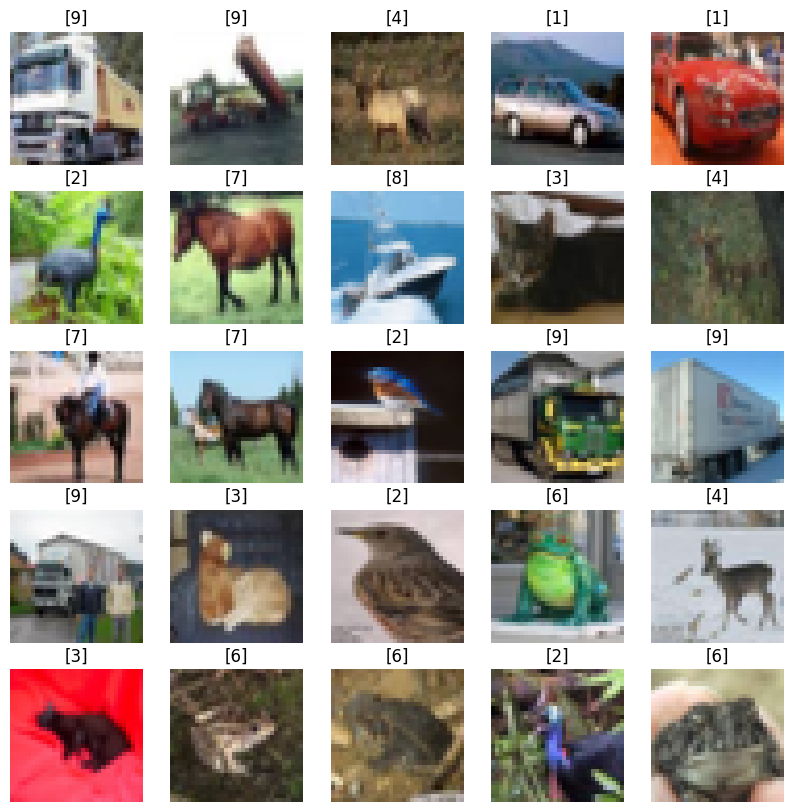

In [4]:
plt.figure(figsize = (10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [5]:
# x_train = np.expand_dims(x_train,-1)
# x_test = np.expand_dims(x_test,-1)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
input_shape = (32,32,3)
num_classes = 10
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Rescaling(1./255),
        # keras.layers.RandomFlip("horizontal"),
        # keras.layers.RandomRotation(0.2),
        keras.layers.Conv2D(32,kernel_size = (3,3),activation='relu'),
        keras.layers.MaxPool2D(pool_size = (2,2)),
        keras.layers.Conv2D(64,kernel_size = (3,3),padding = 'same',activation='relu'),
        keras.layers.MaxPool2D(pool_size = (2,2)),
        keras.layers.Conv2D(128,kernel_size = (3,3),padding = 'same',activation='relu'),
        keras.layers.Conv2D(256,kernel_size = (3,3),padding = 'same',activation='relu'),
        keras.layers.MaxPool2D(pool_size = (2,2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1024,activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes,activation='softmax')
    ]
)

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,758,986 (10.52 MB)

 Trainable params: 2,758,986 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
keras.utils.plot_model(model,to_file='MNIST_CNN.png',show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [10]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)   

In [11]:
history = model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.1)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 37ms/step - accuracy: 0.2928 - loss: 1.9098 - val_accuracy: 0.4894 - val_loss: 1.4100
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 35ms/step - accuracy: 0.5168 - loss: 1.3512 - val_accuracy: 0.5816 - val_loss: 1.1778
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.5745 - loss: 1.1912 - val_accuracy: 0.6260 - val_loss: 1.0685
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.6191 - loss: 1.0739 - val_accuracy: 0.6674 - val_loss: 0.9663
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.6530 - loss: 0.9841 - val_accuracy: 0.6658 - val_loss: 0.9465
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 46s 32ms/step - accuracy: 0.6771 - loss: 0.9131 - val_accuracy: 0.6956 - val_loss: 0.8663
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.7032 - loss: 0.8425 - val_accuracy: 0.7210 - val_loss: 0.8147
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.7203 -

In [12]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7730 - loss: 0.6755


[0.6858696937561035, 0.7716000080108643]

In [55]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

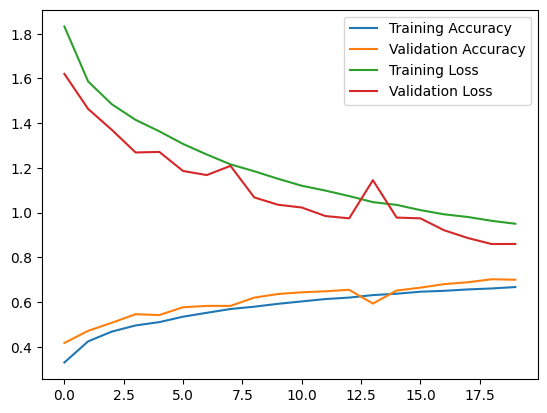

In [57]:
plt.plot(acc,label = 'Training Accuracy')
plt.plot(val_acc,label = 'Validation Accuracy')
plt.plot(loss,label = 'Training Loss')
plt.plot(val_loss,label = 'Validation Loss')
plt.legend()
plt.show()